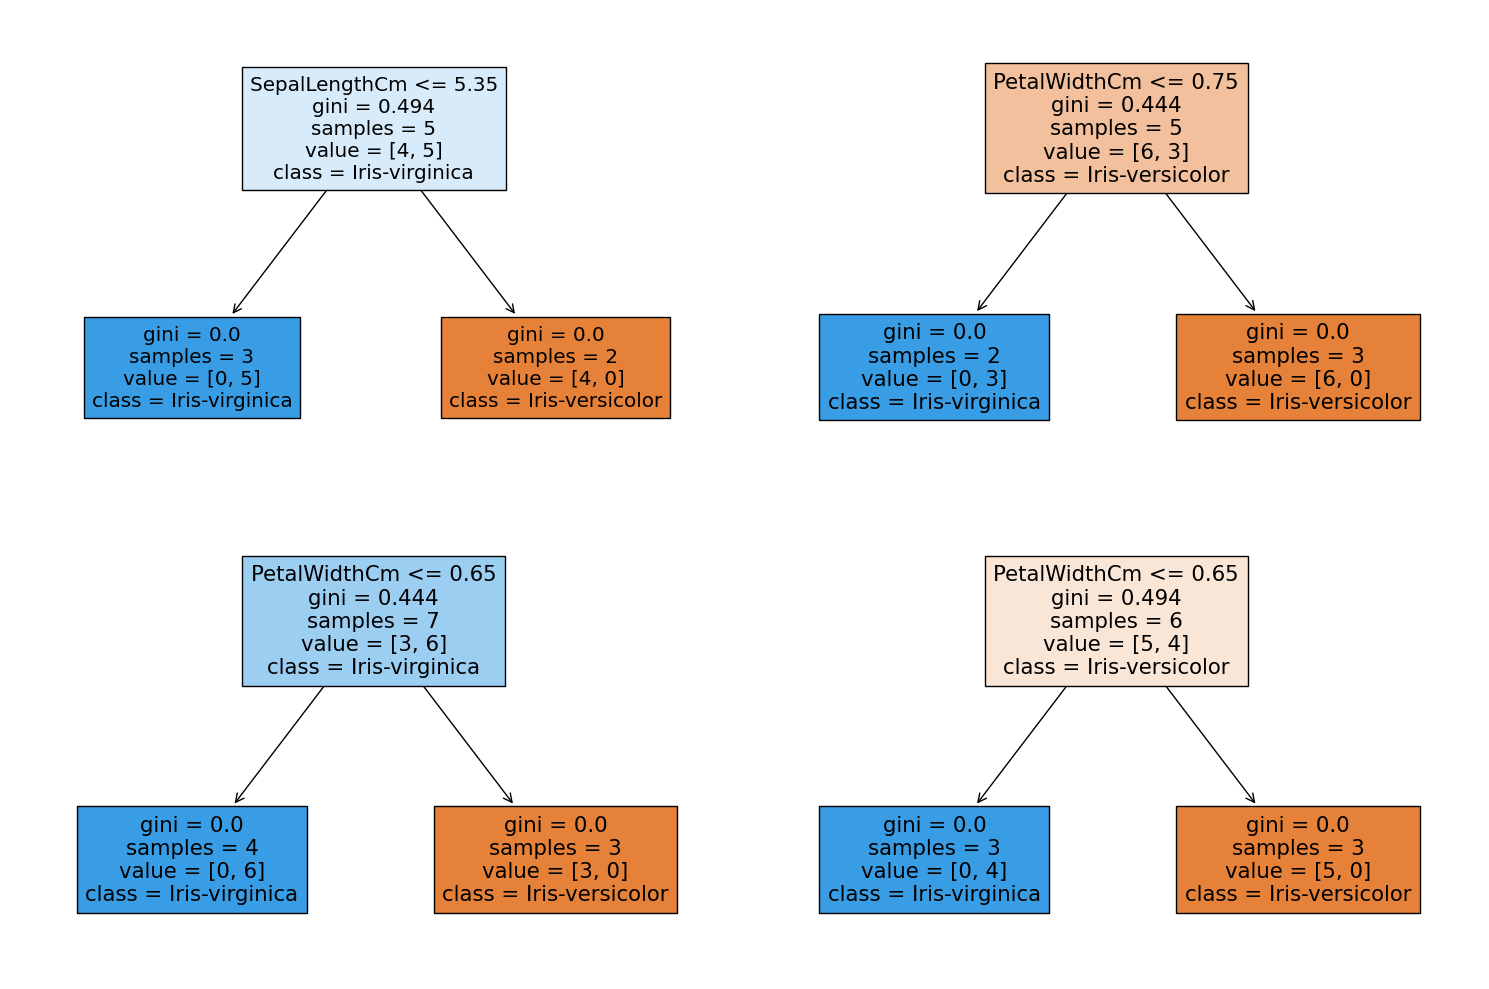

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import pandas as pd

# Đọc dữ liệu từ tập tin CSV
data = pd.read_csv("C:\\Users\\DELL\\Python\\do_an_cuoi_ky\\Iris.csv")

# Chia dữ liệu thành features và nhãn
X = data.drop("Species", axis=1)  # Features
y = data["Species"].apply(lambda x: 1 if x == "Iris-setosa" else 0)  # Nhãn, chuyển đổi "Iris-setosa" thành 1 và các loại khác thành 0

# Khởi tạo và huấn luyện mô hình Random Forest
rf_classifier = RandomForestClassifier(n_estimators=4)  # Số lượng cây con, có thể điều chỉnh
rf_classifier.fit(X, y)

# Truy cập các cây con trong mô hình Random Forest
bootstrap_trees = rf_classifier.estimators_

# Hiển thị các cây con
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))  # Điều chỉnh kích thước và số lượng subplot tùy thuộc vào số lượng cây con
for i, (tree, ax) in enumerate(zip(bootstrap_trees, axes.flatten())):
    ax.set_title(f"Tree {i+1}")
    _ = plot_tree(tree, feature_names=data.columns[:-1],filled=True, class_names=["Iris-versicolor", "Iris-virginica"], ax=ax)  # Sử dụng tên của các cột làm tên cho các features và chỉ định tên của các lớp

plt.tight_layout()
plt.show()


Bootstrap Samples:
      Sample_1  Sample_2  Sample_3  Sample_4  Sample_5  Sample_6  Sample_7  \
Tree                                                                         
0            0         1         4         2         4         6         4   
1            3         5         8         7         0         5         6   
2            6         2         8         1         1         1         7   
3            2         8         8         7         3         7         3   

      Sample_8  Sample_9  
Tree                      
0            6         7  
1            5         1  
2            8         4  
3            0         4  

Random Feature Selection:
      Feature_1  Feature_2
Tree                      
0             1          3
1             1          4
2             1          0
3             1          3


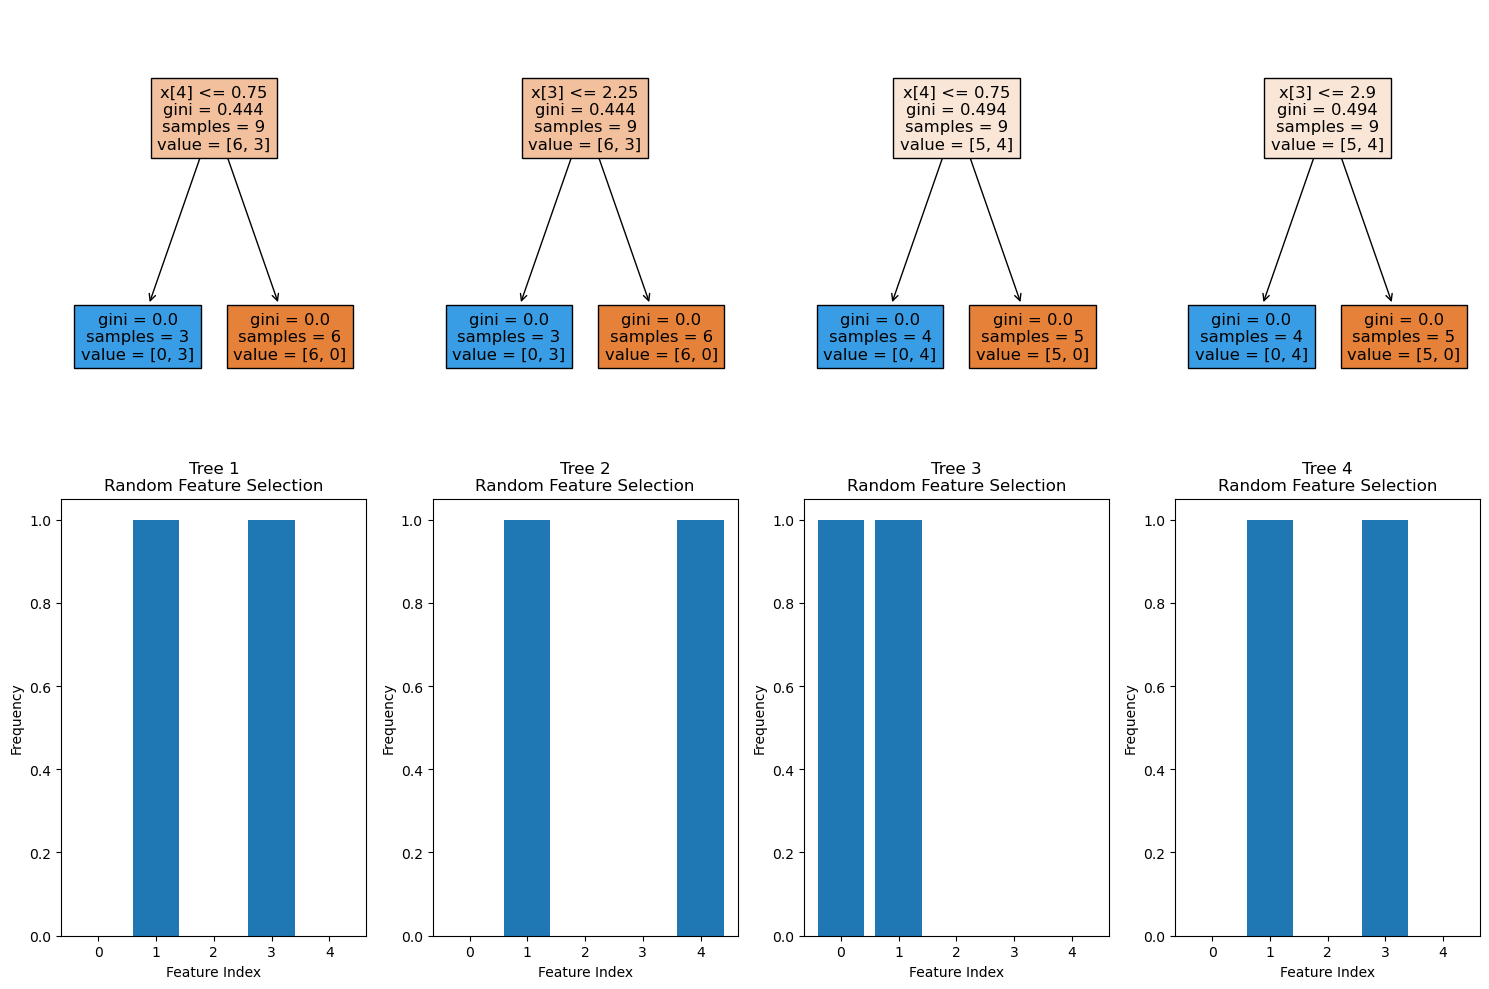

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Load dữ liệu mẫu (Ví dụ: Iris dataset)
data = pd.read_csv("C:\\Users\\DELL\\Python\\do_an_cuoi_ky\\Iris.csv")

# Chia dữ liệu thành features và nhãn
X = data.drop("Species", axis=1)  # Features
y = data["Species"].apply(lambda x: 1 if x == "Iris-setosa" else 0)  # Nhãn, chuyển đổi "Iris-setosa" thành 1 và các loại khác thành 0

# Số lượng mẫu và số lượng features
n_samples, n_features = X.shape

# Số lượng cây con và số lượng features được chọn ngẫu nhiên
n_estimators = 4
max_features = int(np.sqrt(n_features))  # Số lượng feature được chọn mỗi lần

# Khởi tạo một mảng để lưu trữ bootstrap samples và random feature indices
bootstrap_samples = []
random_feature_indices = []

# Tạo các bootstrap samples và random feature indices cho mỗi cây con
for _ in range(n_estimators):
    # Tạo bootstrap sample
    bootstrap_indices = np.random.choice(n_samples, n_samples, replace=True)
    bootstrap_samples.append(bootstrap_indices)
    
    # Chọn ngẫu nhiên các feature
    feature_indices = np.random.choice(n_features, max_features, replace=False)
    random_feature_indices.append(feature_indices)

 #Tạo DataFrame để lưu trữ thông tin về bootstrap samples
bootstrap_df = pd.DataFrame(bootstrap_samples, columns=[f"Sample_{i+1}" for i in range(n_samples)])
bootstrap_df.index.name = "Tree"

# Tạo DataFrame để lưu trữ thông tin về các feature được chọn ngẫu nhiên
feature_df = pd.DataFrame(random_feature_indices, columns=[f"Feature_{i+1}" for i in range(max_features)])
feature_df.index.name = "Tree"

# Hiển thị thông tin về bootstrap samples bằng bảng số liệu
print("Bootstrap Samples:")
print(bootstrap_df)

# Hiển thị thông tin về các feature được chọn ngẫu nhiên bằng bảng số liệu
print("\nRandom Feature Selection:")
print(feature_df)

# Vẽ cây để minh họa thông tin về bootstrap samples và các feature được chọn ngẫu nhiên
plt.figure(figsize=(15, 10))
for i, (bootstrap_indices, feature_indices) in enumerate(zip(bootstrap_samples, random_feature_indices)):
    plt.subplot(2, n_estimators, i+1)
    plt.title(f"Tree {i+1}\nBootstrap Sample")
    tree = DecisionTreeClassifier()
    tree.fit(X.iloc[bootstrap_indices, :], y.iloc[bootstrap_indices])
    plot_tree(tree, filled=True)
    
    plt.subplot(2, n_estimators, n_estimators+i+1)
    plt.title(f"Tree {i+1}\nRandom Feature Selection")
    feature_counts = np.bincount(feature_indices, minlength=n_features)
    plt.bar(range(n_features), feature_counts)
    plt.xlabel("Feature Index")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from tabulate import tabulate

# Load dữ liệu mẫu (Ví dụ: Iris dataset)
data = pd.read_csv("C:\\Users\\DELL\\Python\\do_an_cuoi_ky\\Iris.csv")

# Chia dữ liệu thành features và nhãn
X = data.drop("Species", axis=1)  # Features
y = data["Species"].apply(lambda x: 1 if x == "Iris-setosa" else 0)  # Nhãn, chuyển đổi "Iris-setosa" thành 1 và các loại khác thành 0

# Số lượng mẫu và số lượng features
n_samples, n_features = X.shape

# Số lượng cây con và số lượng features được chọn ngẫu nhiên
n_estimators = 4
max_features = int(np.sqrt(n_features))  # Số lượng feature được chọn mỗi lần

# Khởi tạo một mảng để lưu trữ bootstrap samples và random feature indices
bootstrap_samples = []
random_feature_indices = []

# Tạo các bootstrap samples và random feature indices cho mỗi cây con
for _ in range(n_estimators):
    # Tạo bootstrap sample
    bootstrap_indices = np.random.choice(n_samples, n_samples, replace=True)
    bootstrap_samples.append(bootstrap_indices)
    
    # Chọn ngẫu nhiên các feature
    feature_indices = np.random.choice(n_features, max_features, replace=False)
    random_feature_indices.append(feature_indices)

 #Tạo DataFrame để lưu trữ thông tin về bootstrap samples
bootstrap_df = pd.DataFrame(bootstrap_samples, columns=[f"Sample_{i+1}" for i in range(n_samples)])
bootstrap_df.index.name = "Tree"

# Tạo DataFrame để lưu trữ thông tin về các feature được chọn ngẫu nhiên
feature_df = pd.DataFrame(random_feature_indices, columns=[f"Feature_{i+1}" for i in range(max_features)])
feature_df.index.name = "Tree"

# Hiển thị bảng số liệu cho bootstrap samples
print("Bootstrap Samples:")
print(tabulate(bootstrap_df, headers='keys', tablefmt='fancy_grid'))


Bootstrap Samples:
╒════════╤════════════╤════════════╤════════════╤════════════╤════════════╤════════════╤════════════╤════════════╤════════════╕
│   Tree │   Sample_1 │   Sample_2 │   Sample_3 │   Sample_4 │   Sample_5 │   Sample_6 │   Sample_7 │   Sample_8 │   Sample_9 │
╞════════╪════════════╪════════════╪════════════╪════════════╪════════════╪════════════╪════════════╪════════════╪════════════╡
│      0 │          7 │          0 │          7 │          7 │          2 │          6 │          6 │          7 │          3 │
├────────┼────────────┼────────────┼────────────┼────────────┼────────────┼────────────┼────────────┼────────────┼────────────┤
│      1 │          4 │          4 │          6 │          0 │          4 │          2 │          3 │          8 │          4 │
├────────┼────────────┼────────────┼────────────┼────────────┼────────────┼────────────┼────────────┼────────────┼────────────┤
│      2 │          5 │          7 │          3 │          2 │          8 │          